# Regression

In this section of the tutorial, we will investigate the use of linear regression in `sklearn`. As for all models in the `sklearn` framework, linear regression models mainly rely on `fit(X, y)` and `predict(X)` methods. Once fitted, linear coefficients of the model can be accessed _via_ the `coef_` property. $R^2$ can be computed using the `.score(X, y)` method.

More information about the use of linear regression in `sklearn` can be found at: <http://scikit-learn.org/stable/modules/linear_model.html>.

To begin with, let us import libraries we need and define a function to plot a linear regression in 1D.

In [1]:
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso
import matplotlib.pyplot as plt
import numpy as np

def plot_regression(regressor, data, y):
    plt.scatter(data[:, 0], y, s=40)
    x_left, x_right = data[:,0].min() - .5, data[:,0].max() + .5
    y_left, y_right = regressor.predict([[x_left], [x_right]])
    plt.plot([x_left, x_right], [y_left, y_right], color="r")
    plt.xlim(data[:,0].min() - .5, data[:,0].max() + .5)
    plt.ylim(y.min() - .5, y.max() + .5)

Let us generate some data for which `y` is the sum of a component that is linear in `X` and some Gaussian noise:

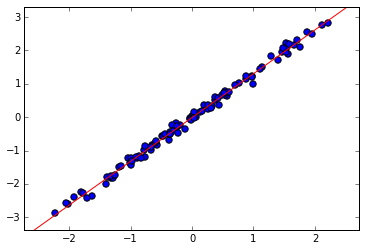

In [2]:
X = np.random.randn(100, 1)
y = 1.3 * X + .1 * np.random.randn(100, 1)
regressor = LinearRegression()
regressor.fit(X, y)
plot_regression(regressor, X, y)

As the noise is of limited magnitude, the model fits the data pretty well:

In [3]:
print("R^2 coefficient of determination: %.4f" % regressor.score(X, y))

R^2 coefficient of determination: 0.9947


# Sparse Linear Regression, Variable Selection

It so happens that one would like to perform variable selection while fitting a linear model. This can be done using the Lasso (see class `Lasso` in `sklearn` <http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso>).
Compared to standard linear models, Lasso ones have an additional property `sparse_coef_` that is a sparse representation of non-zero entries in the vector of regression coefficients.

We now generate data in dimension 30 such that coefficients that linearly link `X` to `y` are greater for even dimensions (and close to 0 for uneven ones).

In [4]:
d = 30
X = np.random.randn(100, d)
beta = [1.3, 0.05] * (d // 2)
y = np.dot(X, beta) + .1 * np.random.randn(100, )
print(beta)

[1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05, 1.3, 0.05]


Now, if we fit a Lasso on this dataset, we get non-zero entries only for even dimensions.

In [5]:
regressor = Lasso(alpha=.2)
regressor.fit(X, y)
print(regressor.sparse_coef_)

  (0, 0)	1.05617908426
  (0, 2)	1.02629455661
  (0, 4)	1.03793641374
  (0, 6)	1.18403131698
  (0, 8)	1.09909940784
  (0, 10)	1.05089948592
  (0, 12)	1.09547069121
  (0, 14)	1.04909010234
  (0, 16)	0.966487004581
  (0, 18)	1.21713300881
  (0, 20)	0.98686143766
  (0, 22)	1.08398813087
  (0, 24)	1.163494737
  (0, 26)	1.11094326391
  (0, 28)	1.04431845091


In [6]:
regressor.score(X, y)

0.97198672377337769

Finally, using only selected covariates, we are able to fit a standard linear model using only those covariates and get a better $R^2$:

In [7]:
reduced_X = X[:, regressor.sparse_coef_.nonzero()[1]]
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
regressor.score(X, y)

0.9997622982324621